In [2]:
import sys
sys.path.append('..')

import os

import torch
import matplotlib.pyplot as plt

In [3]:
log_dir = '/scratch/midway3/jshe/molecular-attention-bias/U_G'

## Biased Attention Transformer

In [4]:
from models.biased_attention_transformer import BiasedAttentionTransformer

In [1]:
exponents_by_layer = []

for root, dirs, files in os.walk(log_dir):
    if not files or 'model.pt' not in files: continue
    *_, model_type, radial_function_type, architecture, run_id = root.split('/')
    if model_type != 'BiasedAttentionTransformer': continue
    if radial_function_type != 'PowerLaw': continue
    if architecture != 'E64H8D8': continue

    model = BiasedAttentionTransformer(
        n_tokens=6, 
        out_features=2, 
        E=128, H=8, D=8, 
        dropout=0.1, 
        radial_function_type="PowerLaw"
    )

    model_file = os.path.join(root, 'model.pt')
    state_dict = torch.load(model_file, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)

    for i, transformer_block in enumerate(model.transformer_blocks):
        if i == len(exponents_by_layer): exponents_by_layer.append([])
        exponents_by_layer[i] += list(transformer_block.radial_function.p.squeeze().detach())

fig, axs = plt.subplots(len(exponents_by_layer), 1, figsize=(6, len(exponents_by_layer)))

for i, (exponents, ax)  in enumerate(zip(exponents_by_layer, axs)):
    ax.hist(exponents, bins=24, color='k')
    ax.set_yticks([])
    ax.set_ylabel(f'Block {i}', rotation=0, labelpad=24)

ax.set_xlabel('Learned $p$')
fig.tight_layout()

NameError: name 'os' is not defined

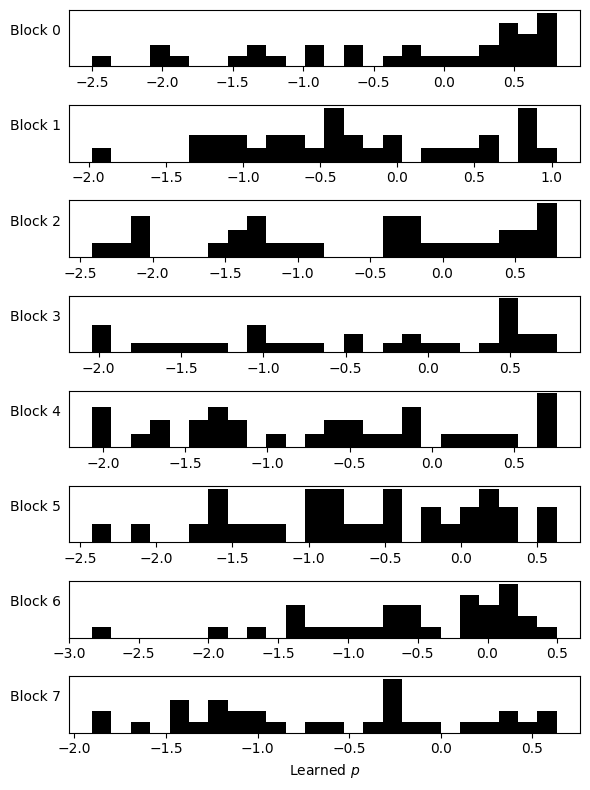

In [7]:
exponents_by_layer = []

for root, dirs, files in os.walk(log_dir):
    if not files or 'model.pt' not in files: continue
    *_, model_type, radial_function_type, architecture, run_id = root.split('/')
    if model_type != 'BiasedAttentionTransformer': continue
    if radial_function_type != 'ExpNegativePowerLaw': continue
    if architecture != 'E64H8D8': continue

    model = BiasedAttentionTransformer(
        n_tokens=6, 
        out_features=2, 
        E=64, H=8, D=8, 
        dropout=0.1, 
        radial_function_type="ExpNegativePowerLaw"
    )

    model_file = os.path.join(root, 'model.pt')
    state_dict = torch.load(model_file, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)

    for i, transformer_block in enumerate(model.transformer_blocks):
        if i == len(exponents_by_layer): exponents_by_layer.append([])
        exponents_by_layer[i] += list(transformer_block.radial_function.log_p.squeeze().detach())

fig, axs = plt.subplots(len(exponents_by_layer), 1, figsize=(6, len(exponents_by_layer)))

for i, (exponents, ax)  in enumerate(zip(exponents_by_layer, axs)):
    ax.hist(exponents, bins=24, color='k')
    ax.set_yticks([])
    ax.set_ylabel(f'Block {i}', rotation=0, labelpad=24)

ax.set_xlabel('Learned $p$')
fig.tight_layout()

## Fixed Attention Transformer

In [8]:
from models.fixed_attention_transformer import FixedAttentionTransformer

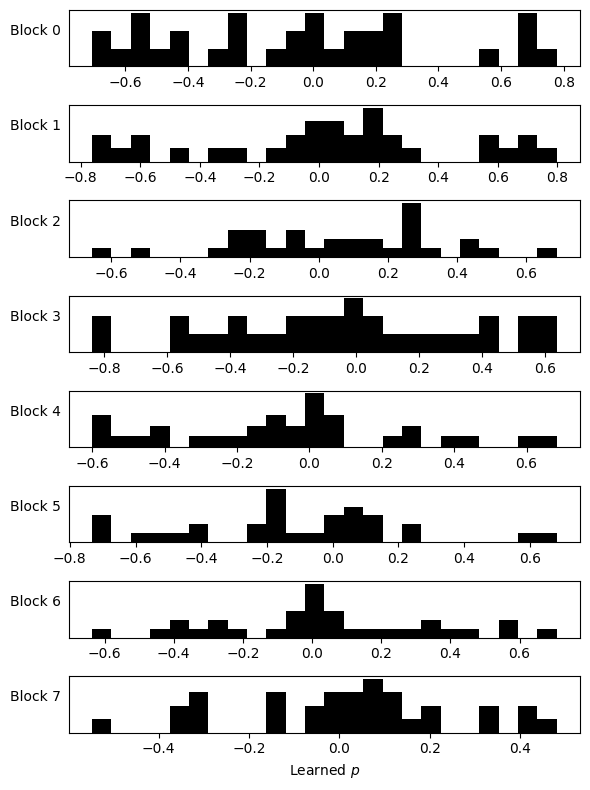

In [9]:
exponents_by_layer = []

for root, dirs, files in os.walk(log_dir):
    if not files or 'model.pt' not in files: continue
    *_, model_type, radial_function_type, architecture, run_id = root.split('/')
    if model_type != 'FixedAttentionTransformer': continue
    if radial_function_type != 'PowerLaw': continue
    if architecture != 'E64H8D8': continue

    model = FixedAttentionTransformer(
        n_tokens=6, 
        out_features=2, 
        E=64, H=8, D=8, 
        dropout=0.1, 
        radial_function_type="PowerLaw"
    )

    model_file = os.path.join(root, 'model.pt')
    state_dict = torch.load(model_file, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)

    for i, transformer_block in enumerate(model.transformer_blocks):
        if i == len(exponents_by_layer): exponents_by_layer.append([])
        exponents_by_layer[i] += list(transformer_block.radial_function.p.squeeze().detach())

fig, axs = plt.subplots(len(exponents_by_layer), 1, figsize=(6, len(exponents_by_layer)))

for i, (exponents, ax)  in enumerate(zip(exponents_by_layer, axs)):
    ax.hist(exponents, bins=24, color='k')
    ax.set_yticks([])
    ax.set_ylabel(f'Block {i}', rotation=0, labelpad=24)

ax.set_xlabel('Learned $p$')
fig.tight_layout()

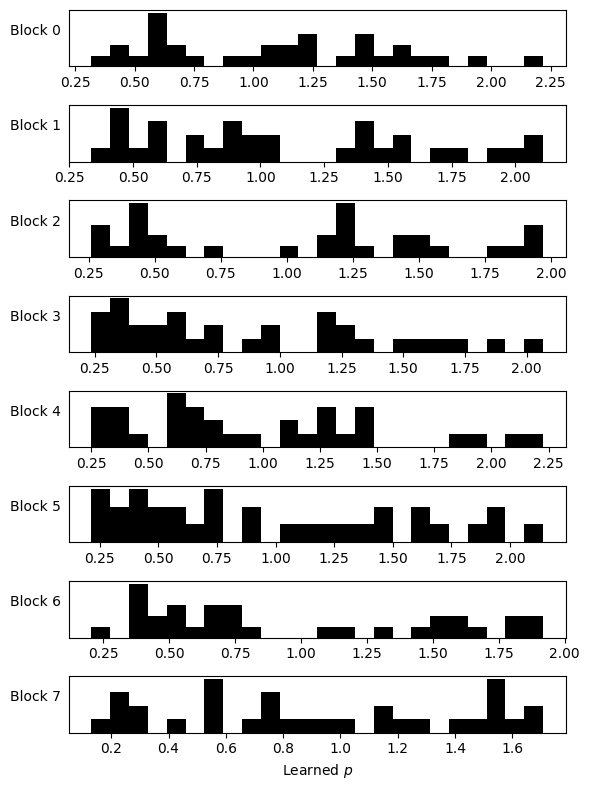

In [ ]:
exponents_by_layer = []

for root, dirs, files in os.walk(log_dir):
    if not files or 'model.pt' not in files: continue
    *_, model_type, radial_function_type, architecture, run_id = root.split('/')
    if model_type != 'FixedAttentionTransformer': continue
    if radial_function_type != 'ExpNegativePowerLaw': continue
    if architecture != 'E64H8D8': continue

    model = FixedAttentionTransformer(
        n_tokens=6, 
        out_features=2, 
        E=64, H=8, D=8, 
        dropout=0.1, 
        radial_function_type="ExpNegativePowerLaw"
    )

    model_file = os.path.join(root, 'model.pt')
    state_dict = torch.load(model_file, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)

    for i, transformer_block in enumerate(model.transformer_blocks):
        if i == len(exponents_by_layer): exponents_by_layer.append([])
        exponents_by_layer[i] += list(transformer_block.radial_function.log_p.exp().squeeze().detach())

fig, axs = plt.subplots(len(exponents_by_layer), 1, figsize=(6, len(exponents_by_layer)))

for i, (exponents, ax)  in enumerate(zip(exponents_by_layer, axs)):
    ax.hist(exponents, bins=24, color='k')
    ax.set_yticks([])
    ax.set_ylabel(f'Block {i}', rotation=0, labelpad=24)

ax.set_xlabel('$p$')
fig.tight_layout()